## Start

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df08 = pd.read_parquet("parquets/train_2008.parquet")
df09 = pd.read_parquet("parquets/train_2009.parquet")
df10 = pd.read_parquet("parquets/train_2010.parquet")
df11 = pd.read_parquet("parquets/train_2011.parquet")
df12 = pd.read_parquet("parquets/train_2012.parquet")
df13 = pd.read_parquet("parquets/train_2013.parquet")
df14 = pd.read_parquet("parquets/train_2014.parquet")
df15 = pd.read_parquet("parquets/train_2015.parquet")
df16 = pd.read_parquet("parquets/train_2016.parquet")
df17 = pd.read_parquet("parquets/train_2017.parquet")
df18 = pd.read_parquet("parquets/train_2018.parquet")
df19 = pd.read_parquet("parquets/train_2019.parquet")
df20 = pd.read_parquet("parquets/train_2020.parquet")
df21 = pd.read_parquet("parquets/train_2021.parquet")
df22 = pd.read_parquet("parquets/train_2022.parquet")
df23 = pd.read_parquet("parquets/train_2023.parquet")
dftest = pd.read_parquet("parquets/test.parquet")

dfs = [df08,df09,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]

for df in dfs:
    df['all_in_out'] = \
        df['atm_transfer_in'] + \
        df['atm_transfer_out'] + \
        df['bank_transfer_in'] + \
        df['bank_transfer_out'] + \
        df['crypto_in'] + \
        df['crypto_out']

    df['all_in_out_volume'] = \
        df['bank_transfer_in_volume'] + \
        df['bank_transfer_out_volume'] + \
        df['crypto_in_volume'] + \
        df['crypto_out_volume']

    df.drop(columns=['name',
                     'atm_transfer_in',
                     'atm_transfer_out',
                     'bank_transfer_in',
                     'bank_transfer_out',
                     'crypto_in',
                     'crypto_out',
                     'bank_transfer_in_volume',
                     'bank_transfer_out_volume',
                     'crypto_in_volume',
                     'crypto_out_volume'],
                     inplace=True)


df = pd.concat(dfs, axis=0, ignore_index=True)

dftest['all_in_out'] = \
    dftest['atm_transfer_in'] + \
    dftest['atm_transfer_out'] + \
    dftest['bank_transfer_in'] + \
    dftest['bank_transfer_out'] + \
    dftest['crypto_in'] + \
    dftest['crypto_out']

dftest['all_in_out_volume'] = \
    dftest['bank_transfer_in_volume'] + \
    dftest['bank_transfer_out_volume'] + \
    dftest['crypto_in_volume'] + \
    dftest['crypto_out_volume']

dftest.drop(columns=['name',
                     'atm_transfer_in',
                     'atm_transfer_out',
                     'bank_transfer_in',
                     'bank_transfer_out',
                     'crypto_in',
                     'crypto_out',
                     'bank_transfer_in_volume',
                     'bank_transfer_out_volume',
                     'crypto_in_volume',
                     'crypto_out_volume'],
                     inplace=True)

df_full = pd.concat([df, dftest.drop(columns=['Usage'])],
                     axis=0,
                     ignore_index=True)

df_full = df_full.sort_values(by='date')

`Id` — уникальный идентификатор этой ежедневной таблицы

`customer_id` — уникальный идентификатор клиента

`interest_rate` — процентная ставка по банковскому счету на этот день

`name` — имя человека

`country` — страна человека

`date_of_birth` — дата рождения человека

`address` — текущий адрес пользователя

`date` — дата событий

`atm_transfer_in` — количество платежей в банкоматах

`atm_transfer_out` — количество операций по снятию средств в банкоматах

`bank_transfer_in` — количество текущих транзакций

`bank_transfer_out` — количество завершенных транзакций

`crypto_in` — количество покупок-криптовалютные транзакции

`crypto_out` — количество транзакций по продаже криптовалюты

`bank_transfer_in_volume` — общий объем текущих транзакций

`bank_transfer_out_volume` — общий объем исходящих транзакций

`crypto_in_volume` — общий объем покупок-криптовалютные транзакции

`crypto_out_volume` — общий объем продаж-криптовалютные транзакции

`churn` — не будет ли клиент больше совершать никаких действий в течение следующих 12 месяцев (ЦЕЛЕВОЙ КОЛОНКА)

`complaints` — количество поданных жалоб

`touchpoints` — список обращений в службу поддержки, с которыми клиент столкнулся в этот день (в списке указано название канала, по которому клиент обратился)

`csat_scores` — оценка удовлетворённости клиента, которую он поставил на основе взаимодействия со службой поддержки. Вложенный словарь с CSAT по каналам поддержки.

`tenure` — количество дней с момента, когда клиент впервые подписал договор с банком или воспользовался продуктом

`from_competitor` — флажок, указывающий, пришел ли клиент от конкурента

`job` — должность клиента

посмотрим какой промежуток времени в тестовом датасете

In [3]:
print(f"Начало: {dftest['date'].min()}")
print(f"Конец: {dftest['date'].max()}")

Начало: 2024-01-01 00:00:00
Конец: 2026-12-31 00:00:00


Значит мы должны при помощи данных с 2008 года по 2023 определить кто уйдёт в следующие 3 года

Первые 2 года мы сможем найти, а вот с последним годом придётся пофантазировать

In [4]:
df.tail().T

,3926053,3926054,3926055,3926056,3926057
Id,4312990,4312991,4312992,4312993,4312994
customer_id,106182,106183,106184,106185,106186
interest_rate,2.5,2.5,2.5,2.5,2.5
country,Lithuania,Slovakia,Czech Republic,Greece,Hungary
date_of_birth,1998-12-27,1977-04-15,1983-06-11,1941-08-27,1974-04-18
address,"1801 Stephanie Plains\nSouth Emmamouth, VA 679...","187 Hamilton Mission\nSarahtown, FM 66596 Slov...","07730 Melissa Highway\nMichaelfurt, AR 77003 C...","352 Sharon Burg\nVictorfurt, KS 47610 Greece","55637 Deanna Cliffs Suite 385\nHodgestown, NH ..."
date,2023-12-31 00:00:00,2023-12-31 00:00:00,2023-12-31 00:00:00,2023-12-31 00:00:00,2023-12-31 00:00:00
complaints,0,0,0,0,0
touchpoints,"[appointment, whatsapp, appointment]",[],[],[],"[phone, whatsapp]"
csat_scores,"{'appointment': None, 'email': None, 'phone': ...","{'appointment': None, 'email': None, 'phone': ...","{'appointment': None, 'email': None, 'phone': ...","{'appointment': None, 'email': None, 'phone': ...","{'appointment': None, 'email': None, 'phone': ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926058 entries, 0 to 3926057
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Id                  int64         
 1   customer_id         int64         
 2   interest_rate       float64       
 3   country             object        
 4   date_of_birth       object        
 5   address             object        
 6   date                datetime64[ns]
 7   complaints          int64         
 8   touchpoints         object        
 9   csat_scores         object        
 10  tenure              int64         
 11  from_competitor     bool          
 12  job                 object        
 13  churn_due_to_fraud  bool          
 14  all_in_out          int64         
 15  all_in_out_volume   float64       
dtypes: bool(2), datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 426.8+ MB


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Id,3926058.0,2163619.714509,1.0,1084868.5,2167207.5,3243857.75,4312994.0,1245626.386944
customer_id,3926058.0,29765.24175,1.0,8906.0,21624.0,45127.0,106186.0,25925.159549
interest_rate,3926058.0,0.521505,0.0,0.0,0.0,0.0,3.5,1.042869
date,3926058,2017-12-14 20:10:30.715082240,2008-01-17 00:00:00,2014-12-28 00:00:00,2018-09-12 00:00:00,2021-04-29 00:00:00,2023-12-31 00:00:00,NaN
complaints,3926058.0,0.021195,0.0,0.0,0.0,0.0,3.0,0.219511
tenure,3926058.0,723.033883,0.0,23.0,418.0,1127.0,5821.0,834.600068
all_in_out,3926058.0,2006.545242,0.0,9.0,293.0,556.0,44550.0,4674.187723
all_in_out_volume,3926058.0,3072.689276,73.571798,271.072894,959.536289,1220.979303,70321.272059,6086.733856


In [7]:
df.select_dtypes(exclude=[np.ndarray, 'object']).nunique()

Id                    3926058
customer_id            106179
interest_rate               6
date                     5828
complaints                  4
tenure                   5303
from_competitor             2
churn_due_to_fraud          2
all_in_out              33747
all_in_out_volume     3648444
dtype: int64

## Первый прогноз

In [8]:
data = []
st = set()

for year in df_full['date'].dt.year.unique():
    df_year = df_full[df_full['date'].dt.year == year]

    st_new = set(df_year['customer_id'])

    new_customers = len(st_new.difference(st))
    left_customers = len(st.difference(st_new))
    total_customers = len(st_new)

    percentage_left = (left_customers / total_customers) * 100 if total_customers > 0 else 0

    data.append({
        "year": year,
        "new_customers": new_customers,
        "left_customers": left_customers,
        "total_customers": total_customers,
        "percentage_left": round(percentage_left, 2)
    })

    st = st_new

df_stats = pd.DataFrame(data)
df_stats

,year,new_customers,left_customers,total_customers,percentage_left
0,2008,1749,0,1749,0.00
1,2009,1856,80,3525,2.27
2,2010,2245,228,5542,4.11
3,2011,2465,413,7594,5.44
4,2012,2737,600,9731,6.17
5,2013,3128,807,12052,6.70
6,2014,3502,981,14573,6.73
7,2015,3865,1254,17184,7.30
8,2016,4301,1513,19972,7.58
9,2017,4706,1940,22738,8.53


In [9]:
total_customers = df_stats["total_customers"].sum()
left_customers = df_stats["left_customers"].sum()

churn_probability = left_customers / total_customers

print(f"Вероятность оттока за всё время: {churn_probability:.2f}")

Вероятность оттока за всё время: 0.12


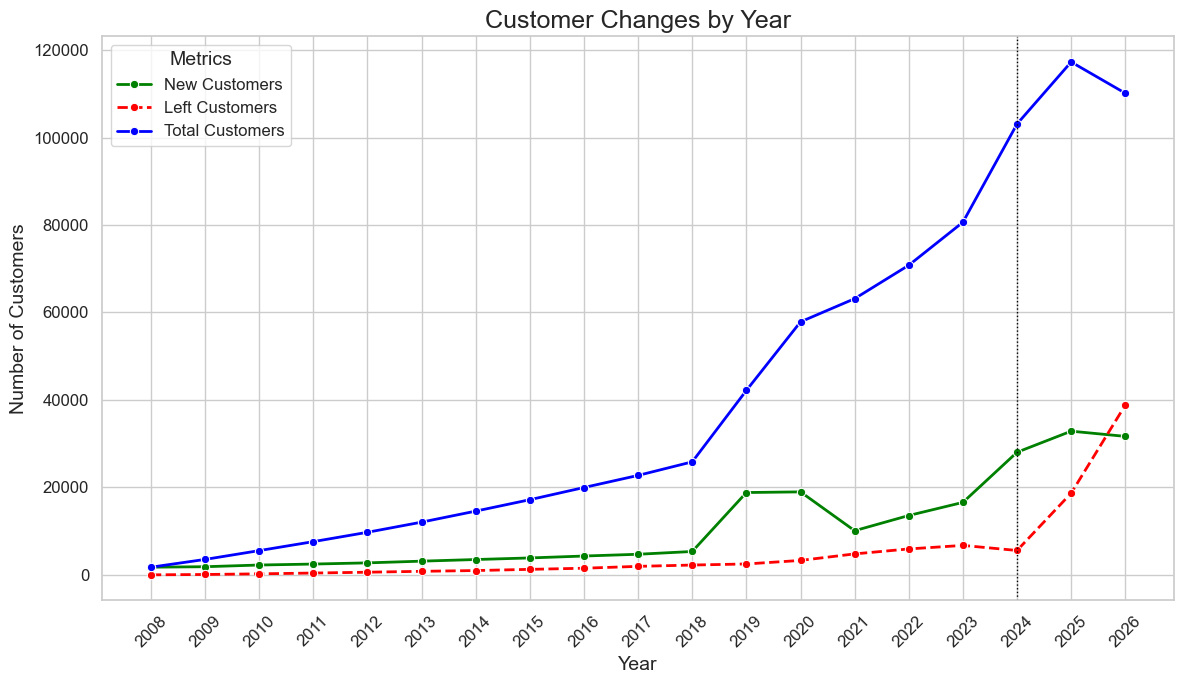

In [10]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

sns.lineplot(
    x="year", y="new_customers", data=df_stats, label="New Customers",
    marker="o", color="green", linewidth=2
)

sns.lineplot(
    x="year", y="left_customers", data=df_stats, label="Left Customers",
    marker="o", color="red", linestyle="--", linewidth=2
)

sns.lineplot(
    x="year", y="total_customers", data=df_stats, label="Total Customers",
    marker="o", color="blue", linewidth=2
)

plt.axvline(x=2024, color="black", linestyle=":", linewidth=1)

plt.title("Customer Changes by Year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(df_stats["year"], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Metrics", fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.show()

## Эксперименты

In [11]:
# dftest["churn"] = 0

# for customer_id, group in tqdm(dftest.groupby("customer_id")):
#     group = group.sort_values(by="date")
#     last_idx = group.index[-1]  # Индекс последней транзакции пользователя

#     last_date = group.loc[last_idx, "date"]
#     if last_date.year < 2026:
#         dftest.loc[last_idx, "churn"] = 1
#     elif last_date.year == 2026:
#         dftest.loc[last_idx, "churn"] = 0.12

Я попробовал сохранить, но результат был ужасным. Log loss был около 24!

In [12]:
# dftest["churn"] = 0.01 # Сделал лучше на ~ 0.001 log loss

# for customer_id, group in tqdm(dftest.groupby("customer_id")):
#     group = group.sort_values(by="date")
#     last_idx = group.index[-1]

#     last_date = group.loc[last_idx, "date"]
#     if last_date.year < 2026:
#         dftest.loc[last_idx, "churn"] = 0.99  # Сделал лучше на ~ 21.0 log loss
#     elif last_date.year == 2026:
#         dftest.loc[last_idx, "churn"] = 0.12

Log loss понизился до 3. Было очень странно, что среди НЕпоследих транзакций есть значение 1.. Но ещё более странно, что среди пользователей, которые делали последнюю транзакцию только 2025, оказались 0, причём много т.к. понижение с 1 до 0.99 понизил log loss на 21.

Я попробовал равнять все последние транзакции в 0.11 и результат log loss стал равен 0.22450. Я пришёл к выводу, что 12 месяцев отсчитывается с конца 2026 года, а не с момента последней транзакции. Ну ок, что поделать.

In [13]:
dftest["churn"] = 0

for customer_id, group in tqdm(dftest.groupby("customer_id")):
    group = group.sort_values(by="date")
    last_idx = group.index[-1]
    dftest.loc[last_idx, "churn"] = 0.11

    for i in range(len(group) - 1):
        current_idx = group.index[i]
        current_date = group.loc[current_idx, "date"]
        next_date = group.loc[group.index[i + 1], "date"]
        
        # Если разрыв с следующей транзакцией >= 12 месяцев
        if (next_date - current_date).days >= 365:
            dftest.loc[current_idx, "churn"] = 1

100%|██████████| 165155/165155 [03:57<00:00, 696.58it/s] 


Я попробовал поставить значение 1 для тех транзакций, которые 100% имеют разрыв со следующем на 12 месяцев и результат почти не поменялся. А вот когда я обнулил значение для тех, кто меньше 12 месяцев, то log loss вырос..

Это большая проблема т.к. я не понимаю как именно система считает

In [14]:
print(f"All: {dftest.shape[0]}")
print(f"Number of '0': {sum(dftest["churn"] == 0)}")
print(f"Number of '1': {sum(dftest["churn"] == 1)}")
print(f"Number of '0.11': {sum(dftest["churn"] == 0.11)}")

All: 1360472
Number of '0': 1032480
Number of '1': 162837
Number of '0.11': 165155


In [15]:
dftest[dftest["churn"] == 1]["Usage"].value_counts()

Usage
Private    162837
Name: count, dtype: int64

А! Так они все на *Private* и поэтому их не учитывают..

Ладно, на данный момент лучшая модель эта, продолжим исследование после создания чат-бота